# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('laptop_clean.csv',index_col=0)

import pandas_profiling as pp
pp.ProfileReport(df)

In [3]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price', 'Pixel', 'full_hd',
       'ips panel', 'touchscreen', '4k ultra hd', 'quad hd+', 'retina display',
       'CPU-a', 'CPU-b', 'SSD', 'HDD', 'Flash_storage', 'Hybrid_storage',
       'GPU-a', 'GPU-b', 'MX_GPU', 'Gr_AMDc', 'Gr_AMDr', 'GTX_card'],
      dtype='object')

In [4]:
cat_col = ['Manufacturer','Category','Operating System','Pixel', 'full_hd','Operating System Version',
       'ips panel', 'touchscreen', '4k ultra hd', 'quad hd+', 'retina display',
       'CPU-a','GPU-a','Screen Size']
num_col = ['RAM','Weight','SSD', 'HDD', 'Flash_storage', 'Hybrid_storage','MX_GPU','Gr_AMDc', 'Gr_AMDr', 'GTX_card','CPU-b']
for i in cat_col:
    df[i]=df[i].astype('category')

In [5]:
df['Screen Size']=df['Screen Size'].astype('str')

In [6]:
df['Screen Size']=df.apply(lambda x : x['Screen Size']+'"',axis =1 )

### Visualization đơn biến

In [7]:
def plot_distribution (data, col_name, bins=10,ax=None):
    plot_data = data[col]
    ax = sns.histplot(x=plot_data,bins=bins,ax=ax,kde=True)
    title = 'Distribution of {}'.format(col_name)
    ax.set_title(title)
def plot_valuecount (data, col_name,ax = None):
    plot_data = data[col]
    ax = sns.countplot(x=plot_data,ax=ax)
    title = 'Value count of {}'.format(col_name)
    ax.set_title(title)
    plt.xticks(rotation=50,fontsize=6)

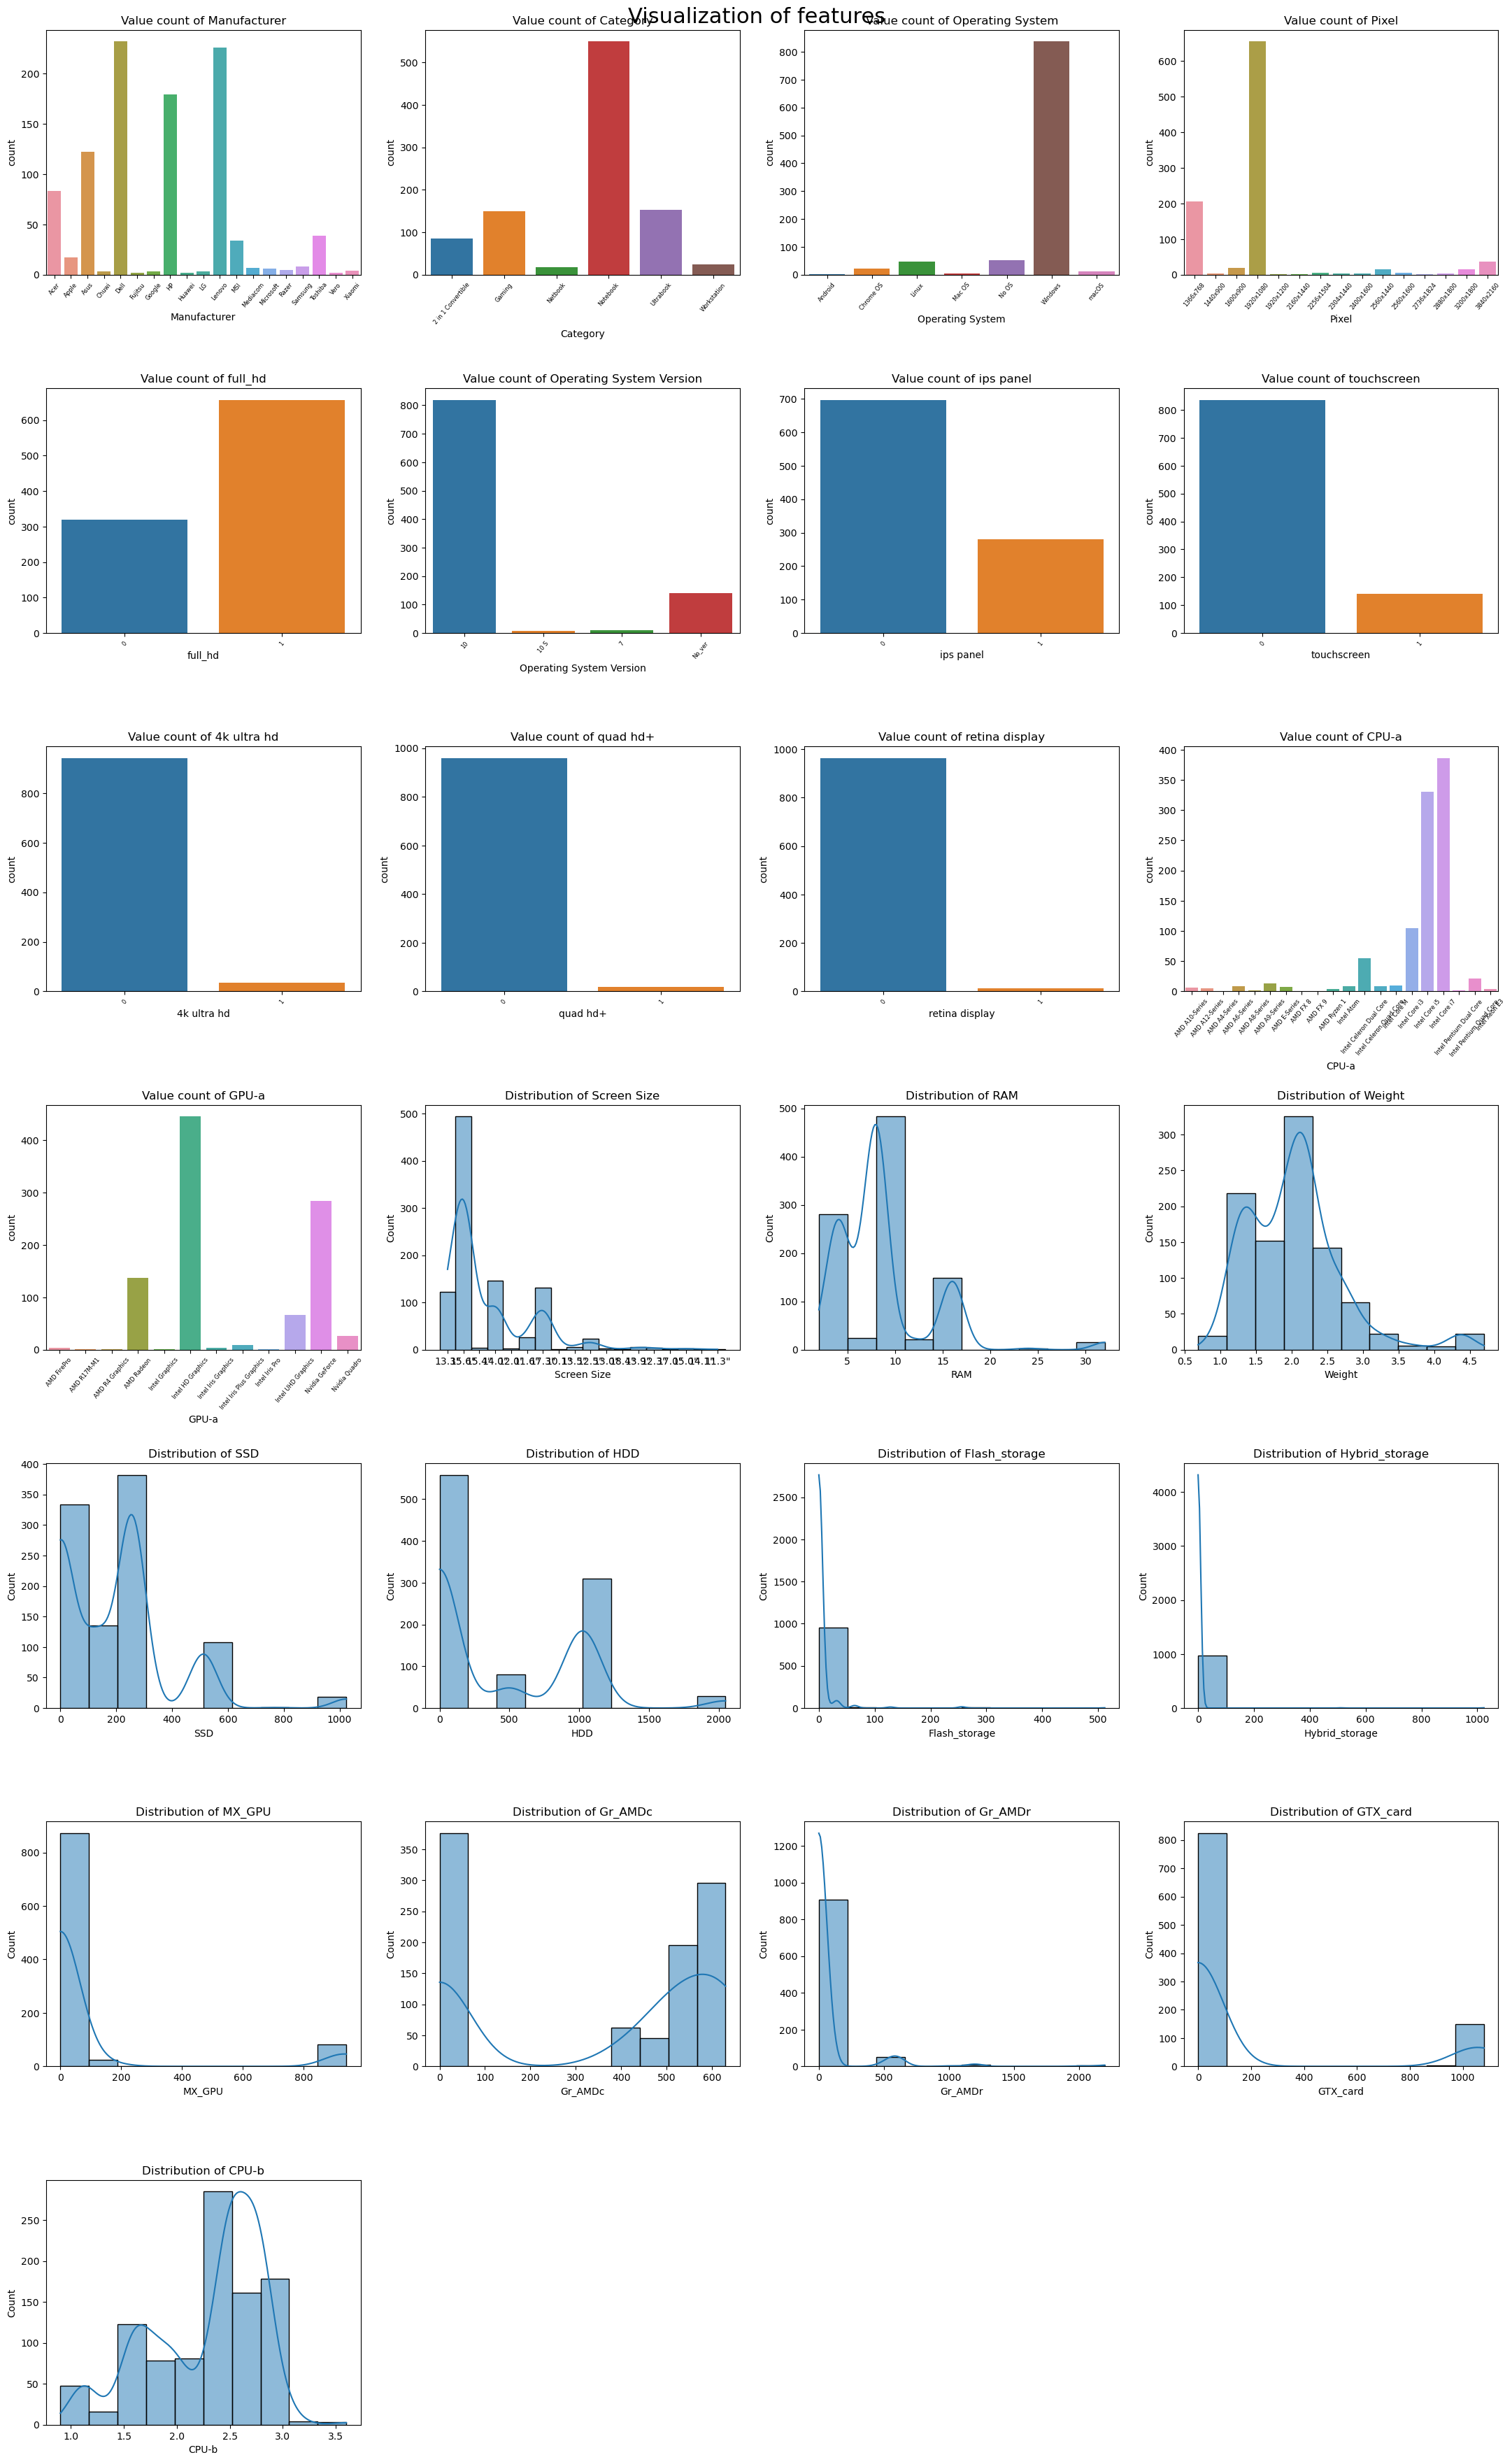

In [8]:
fig = plt.figure(figsize=(22,36))

for i,col in enumerate (cat_col+num_col):
    ax = fig.add_subplot(7, 4, i+1)
    if df[col].dtypes == 'category':
        plot_valuecount(df,col,ax=ax)
    else :
        plot_distribution(df,col,bins=10,ax=ax)   
fig.suptitle('Visualization of features',fontsize = 22)
plt.tight_layout(pad=2);

### Visualization đơn biến với variable y (Price)

In [9]:
def plot_distribution (data, col_name,ax=None):
    y = data['Price']
    plot_data = data[col]
    ax = sns.scatterplot(x=plot_data,ax=ax,y=y)
    title = 'Distribution of {}'.format(col_name)
    ax.set_title(title)
def plot_valuecount (data, col_name,ax = None):
    y=data['Price']
    plot_data = data[col]
    ax = sns.barplot(x=plot_data,y=y,ax=ax)
    title = 'Value count of {}'.format(col_name)
    ax.set_title(title)
    plt.xticks(rotation=50,fontsize=6)

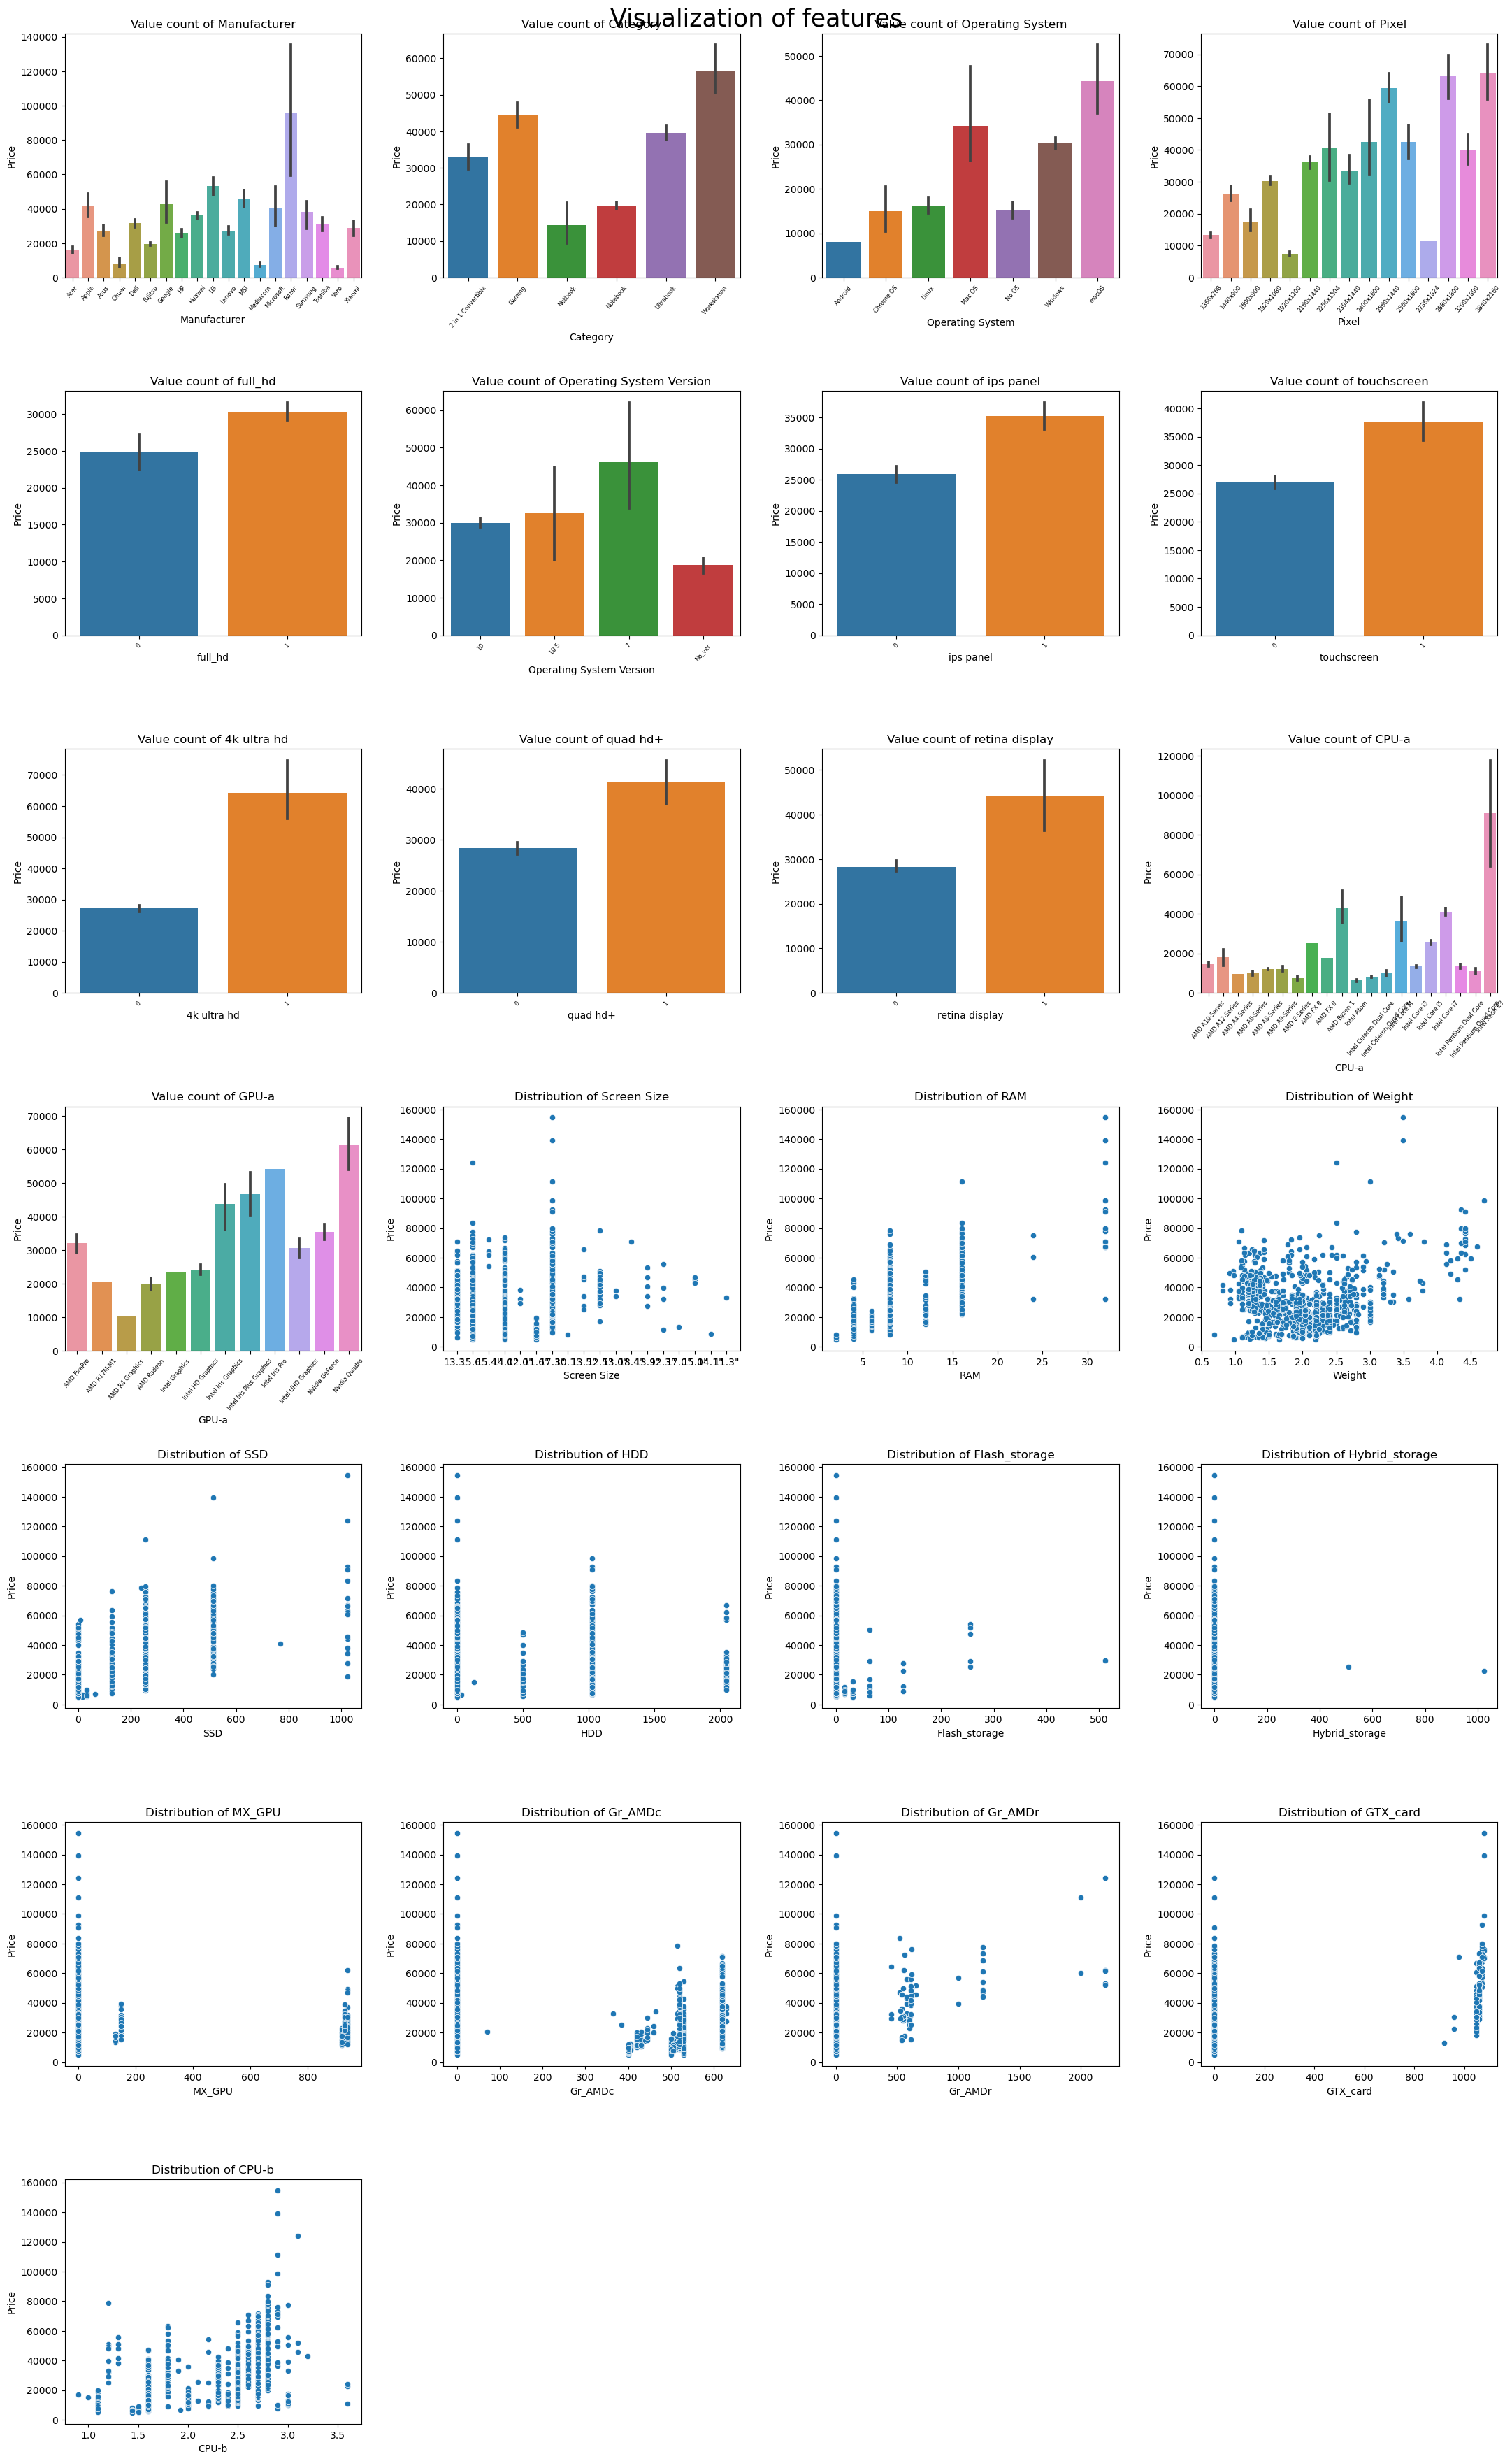

In [10]:
fig = plt.figure(figsize=(22,36))

for i,col in enumerate (cat_col+num_col):
    ax = fig.add_subplot(7, 4, i+1)
    if df[col].dtypes == 'category':
        plot_valuecount(df,col,ax=ax)
    else :
        plot_distribution(df,col,ax=ax)   
fig.suptitle('Visualization of features',fontsize = 25)
plt.tight_layout(pad=2);

In [11]:
first_col = df.pop('Price')
df.insert(0, 'Price', first_col)

In [12]:
cor = df.corr()

<AxesSubplot: >

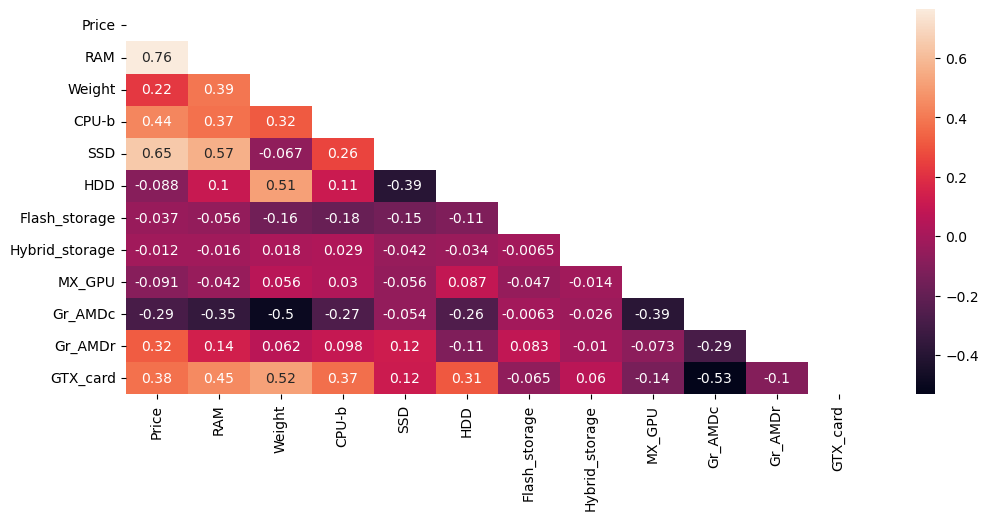

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor, annot=True, mask=mask)

## . FE

### continous variable

In [14]:
from optbinning import ContinuousOptimalBinning,OptimalBinning

(CVXPY) May 03 07:03:58 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 03 07:03:58 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [15]:
variable = "Weight"
x = df[variable].values
y = df.Price

In [16]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical")

In [17]:
optb.fit(x, y)

ContinuousOptimalBinning(name='Weight')

In [18]:
optb.splits

array([1.19500005, 1.38499999, 1.84500003, 2.08999991, 2.15500009,
       2.21500003, 2.41500008, 3.07000005])

In [19]:
binning_table = optb.binning_table

In [20]:
x_transform_bins = optb.transform(x, metric="bins")

In [21]:
df['Weight-bins']=pd.Series(x_transform_bins).astype('category')

In [22]:
a = 'Weight-bins'
cat_col.append(a)

# Model

In [23]:
features = num_col+cat_col
X = df[features]
y = df['Price']

In [24]:
features

['RAM',
 'Weight',
 'SSD',
 'HDD',
 'Flash_storage',
 'Hybrid_storage',
 'MX_GPU',
 'Gr_AMDc',
 'Gr_AMDr',
 'GTX_card',
 'CPU-b',
 'Manufacturer',
 'Category',
 'Operating System',
 'Pixel',
 'full_hd',
 'Operating System Version',
 'ips panel',
 'touchscreen',
 '4k ultra hd',
 'quad hd+',
 'retina display',
 'CPU-a',
 'GPU-a',
 'Screen Size',
 'Weight-bins']

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer,make_column_selector

In [26]:
num_tr = Pipeline(steps=[('scaler',MinMaxScaler())])
cat_tr = Pipeline(steps=[('enc',OneHotEncoder(handle_unknown='ignore'))])

In [27]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_tr,num_col),
    ('cat',cat_tr,cat_col)
])

In [28]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['RAM', 'Weight', 'SSD', 'HDD',
                                  'Flash_storage', 'Hybrid_storage', 'MX_GPU',
                                  'Gr_AMDc', 'Gr_AMDr', 'GTX_card', 'CPU-b']),
                                ('cat',
                                 Pipeline(steps=[('enc',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Manufacturer', 'Category',
                                  'Operating System', 'Pixel', 'full_hd',
                                  'Operating System Version', 'ips panel',
                                  'touchscreen', '4k ultra hd', 'quad hd+',
                                  'retina display', 'CPU-a', 'GPU-a',
                                  'Screen Size', 'Weight-bins'])])

In [29]:
X = preprocessor.transform(X)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5)
X_train.shape, X_val.shape,X_test.shape

((586, 133), (195, 133), (196, 133))

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV,LogisticRegressionCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
fs = RandomForestRegressor(n_estimators=122,max_depth=22)
fs.fit(X_train,y_train)

RandomForestRegressor(max_depth=22, n_estimators=122)

In [34]:
y_preds = fs.predict(X_val)
print(fs.score(X_val,y_val))
y_preds_test = fs.predict(X_test)
print(fs.score(X_test,y_test))

0.8868188588291763
0.846275801867715


In [35]:
print(mean_absolute_error(y_val,y_preds),\
      mean_absolute_error(y_test,y_preds_test))

4091.051803856516 4312.52988595431


In [36]:
# RMSE
print(math.sqrt(mean_squared_error(y_val,y_preds)))
print(math.sqrt(mean_squared_error(y_test,y_preds_test)))

6171.845951645138
6816.336846535274


df_1 = pd.DataFrame({'y':y_val[30:50],'y_preds':y_preds[30:50]})
df_1

In [37]:
from xgboost import XGBRegressor

In [38]:
xgb = XGBRegressor(n_estimators=850, max_depth=6, eta=0.03, subsample=0.8, colsample_bytree=0.8)

In [39]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.03, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=850, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [40]:
y_preds1 = xgb.predict(X_val)
print(xgb.score(X_val,y_val))
y_preds1_test = xgb.predict(X_test)
print(xgb.score(X_test,y_test))

0.9149008587150389
0.8417596824594135


In [41]:
print(mean_absolute_error(y_val,y_preds1),\
      mean_absolute_error(y_test,y_preds1_test))

3619.172550004808 4090.257471550223


In [42]:
df_3 = pd.DataFrame({'y':y_val[20:30],'y_preds':y_preds1[20:30]})
print(df_3)
df_4 = pd.DataFrame({'y':y_test[20:30],'y_preds':y_preds1_test[20:30]})
print(df_4)

                y       y_preds
252  11885.491800  14027.924805
859  11885.491800  10337.814453
503   7577.317800   8560.225586
184  30385.297800  22798.642578
652  36743.655780  39263.097656
278  12392.335800  13241.696289
952  36999.612000  36683.449219
122  15940.243800  17171.673828
894  67131.487800  54755.535156
583  38960.844858  45957.378906
                y       y_preds
170  34186.627800  34202.312500
94   26583.967800  37176.453125
788  58261.717800  59421.433594
715  21720.039354  23563.275391
753  27775.051200  27727.609375
236   9883.458000   8751.674805
823  30385.297800  26218.730469
433  61961.679000  52580.320312
12   61834.207734  58232.859375
418  13683.520890  16908.671875


In [43]:
math.sqrt(mean_squared_error(y_val,y_preds1))

5351.68610017391

In [44]:
from catboost import CatBoostRegressor

In [45]:
catb = CatBoostRegressor(learning_rate=0.02,n_estimators=1700,max_depth=6,verbose=100,od_type='Iter',od_wait=20)

In [46]:
catb.fit(X_train,y_train,eval_set=(X_val,y_val),use_best_model=True,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 17805.2785210	test: 18218.4261544	best: 18218.4261544 (0)	total: 139ms	remaining: 3m 55s
100:	learn: 8677.2691004	test: 9357.4911692	best: 9357.4911692 (100)	total: 475ms	remaining: 7.51s
200:	learn: 6633.7538796	test: 7343.0440599	best: 7343.0440599 (200)	total: 765ms	remaining: 5.7s
300:	learn: 5816.8930081	test: 6569.4901695	best: 6569.4901695 (300)	total: 994ms	remaining: 4.62s
400:	learn: 5253.2325662	test: 6114.1732818	best: 6114.1732818 (400)	total: 1.19s	remaining: 3.86s
500:	learn: 4739.8056710	test: 5842.4763554	best: 5841.6315826 (499)	total: 1.4s	remaining: 3.35s
600:	learn: 4271.3113083	test: 5687.3974174	best: 5687.3974174 (600)	total: 1.62s	remaining: 2.97s
700:	learn: 3933.6650028	test: 5598.5851633	best: 5598.5851633 (700)	total: 1.84s	remaining: 2.62s
800:	learn: 3636.9824670	test: 5534.7726626	best: 5534.4154310 (799)	total: 2.07s	remaining: 2.32s
900:	learn: 3394.2826526	test: 5486.1558665	best: 5486.1558665 (900)	total: 2.35s	remaining: 2.08s
1000:	learn:

In [47]:
print(catb.score(X_val,y_val))
print(catb.score(X_test,y_test))

0.9143844824394857
0.860703013581783


In [48]:
y_pred4 = catb.predict(X_val)
print(mean_absolute_error(y_val,y_pred4))
y_pred4_test = catb.predict(X_test)
print(mean_absolute_error(y_test,y_pred4_test))

3798.439237709393
4113.109455990903


In [49]:
df_5 = pd.DataFrame({'y':y_val[:],'y_preds':y_pred4[:]})
df_6 = pd.DataFrame({'y':y_test[:],'y_preds':y_pred4_test[:]})
df_7 = pd.concat([df_5,df_6],axis=0)
df_7.head()

,y,y_preds
664,37678.022694,38483.474840
382,41941.341000,37504.851129
181,35453.737800,36224.763737
333,11378.647800,12013.737794
483,6307.673580,10883.272053


In [50]:
df_6['error']=np.abs(df_6['y']-df_6['y_preds'])
df_6.sort_values('error',ascending=False).head()

,y,y_preds,error
749,111226.915800,60048.487528,51178.428272
238,98581.158000,78798.727437,19782.430563
816,45590.617800,64867.422764,19276.804964
6,54231.547734,36182.664892,18048.882842
931,40015.333800,24465.224241,15550.109559


In [51]:
# features importance
feature_import = [t for t in zip(features,catb.get_feature_importance())]
feature_import_df = pd.DataFrame(feature_import, columns=['Feature','Varimp'])
feature_import_df = feature_import_df.sort_values('Varimp',ascending=False)
feature_import_df.head(5)

,Feature,Varimp
0,RAM,23.342164
1,Weight,11.673565
2,SSD,11.155984
10,CPU-b,7.688026
9,GTX_card,4.682739
